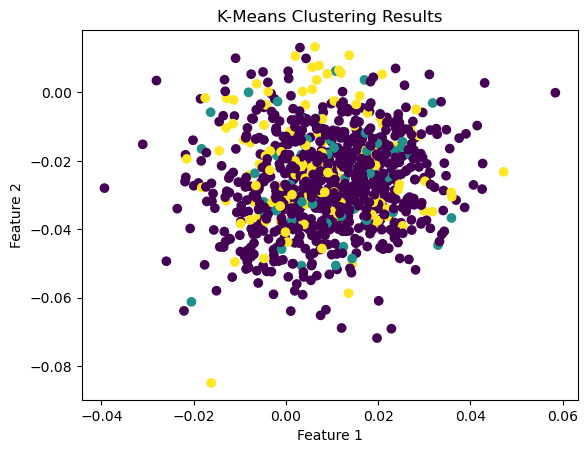

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset, assuming the first row contains headers
df = pd.read_csv('final1.csv')

# Check if the last column is non-numeric (e.g., class labels) and remove it
if not pd.to_numeric(df.iloc[:, -1], errors='coerce').notnull().all():
    df = df.iloc[:, :-1]

# Check if any columns contain non-numeric values and convert them to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Specify the number of clusters (k)
k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

# Save the results back to a new CSV file
df.to_csv('clustered_dataset.csv', index=False)

# Visualize the clusters (2D scatter plot for the first two features)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


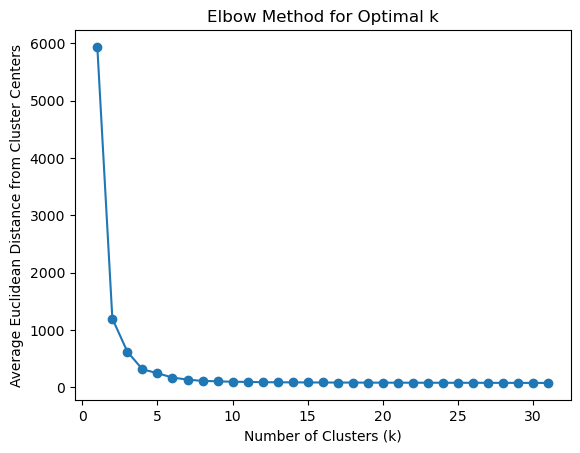

In [3]:
import numpy as np

# Check if any columns contain non-numeric values and convert them to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Determine the ideal k using the elbow method
distortions = []
k_range = range(1, 32)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance from Cluster Centers')
plt.show()


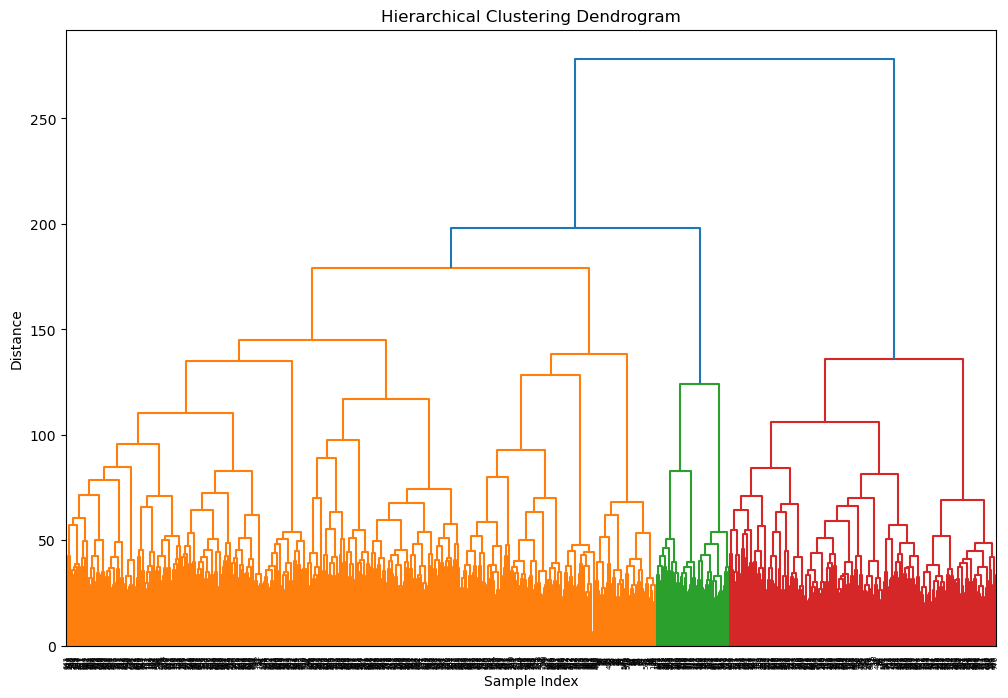

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering


# Handle missing values (replace NaN with mean)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Standardize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

# Perform hierarchical clustering
linkage_matrix = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Perform Agglomerative Clustering with a specific number of clusters
# Adjust the number of clusters as needed
num_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
df['cluster'] = agg_clustering.fit_predict(df_scaled)

# Optional: Save the clustering results to a new CSV file
df.to_csv('agglomerative_clustered_dataset.csv', index=False)
